In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.stats import f_oneway

In [3]:
df = pd.read_csv('/home/saule/ds_bootcamp/Project-/release/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19737 non-null  int64  
 1   rooms                  19737 non-null  object 
 2   adress                 19737 non-null  object 
 3   area                   19737 non-null  object 
 4   building               19737 non-null  object 
 5   parking                19737 non-null  object 
 6   price                  19737 non-null  object 
 7   description            19737 non-null  object 
 8   repair                 19737 non-null  object 
 9   rooms_square           19737 non-null  object 
 10  balcony                19737 non-null  object 
 11  windows                19737 non-null  object 
 12  bathroom               19737 non-null  object 
 13  сhildren/pets_allowed  19737 non-null  object 
 14  additionally           19737 non-null  object 
 15  ho

In [4]:
# преобразование цены
# в руб
def get_price(y):
  r = ''
  for i in y:
    if i.isdigit():
      r += i
    else:
      r += ' '
  return int(r.split()[0])

def get_deposit(y):
  r = ''
  for i in y:
    if i.isdigit():
      r += i
    else:
      r += ' '
  try:
      if int(r.split()[2]) < 1000 or int(r.split()[2]) > int(r.split()[0]) * 6:
        return int(r.split()[0])
      else:
        return int(r.split()[2])
  except:
      return int(r.split()[0])
x1 = df['price'].map(get_price)
x2 = df['price'].map(get_deposit)
# срок аренды
def extract_rent_term(text):
    match = re.search(r'Срок аренды - (Длительный|На несколько месяцев)', text)
    if match:
        term = match.group(1)
        if term == 'Длительный':
            return 1
        elif term == 'На несколько месяцев':
            return 0
    else:
        return None
# добавляем столбцы Цена за мес, залог и срок аренды
df['rental_term'] = df['price'].apply(extract_rent_term)
df.insert(9, "rental_price",x1)
df.insert(10,'deposit',x2)
df = df.drop(columns=['price'])


In [5]:
df.head()

,id,rooms,adress,area,building,parking,description,repair,rental_price,deposit,...,windows,bathroom,сhildren/pets_allowed,additionally,housing_complex,ceiling_height,elevator,garbage_chute,floor_count,rental_term
0,271271157,4,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,500000,500000,...,Во двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да,16,1
1,271634126,4,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,500000,500000,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет,16,1
2,271173086,"4, Оба варианта","Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,500000,500000,...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.2,Пасс (1),Нет,16,1
3,272197456,"4, Оба варианта","Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,400000,400000,...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",0,3.2,Пасс (1),Да,6,1
4,273614615,2,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",Unknown,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,225000,225000,...,На улицу и двор,Совмещенный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,3.9,"Пасс (1), Груз (1)",Да,26,1


In [6]:
df['ceiling_height'].describe()

count    19737.000000
mean         2.766803
std          0.239103
min          2.000000
25%          2.600000
50%          2.700000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

In [7]:
#Свыше 3,5 метров квартир дешевле нет

Text(0, 0.5, 'Цена аренды')

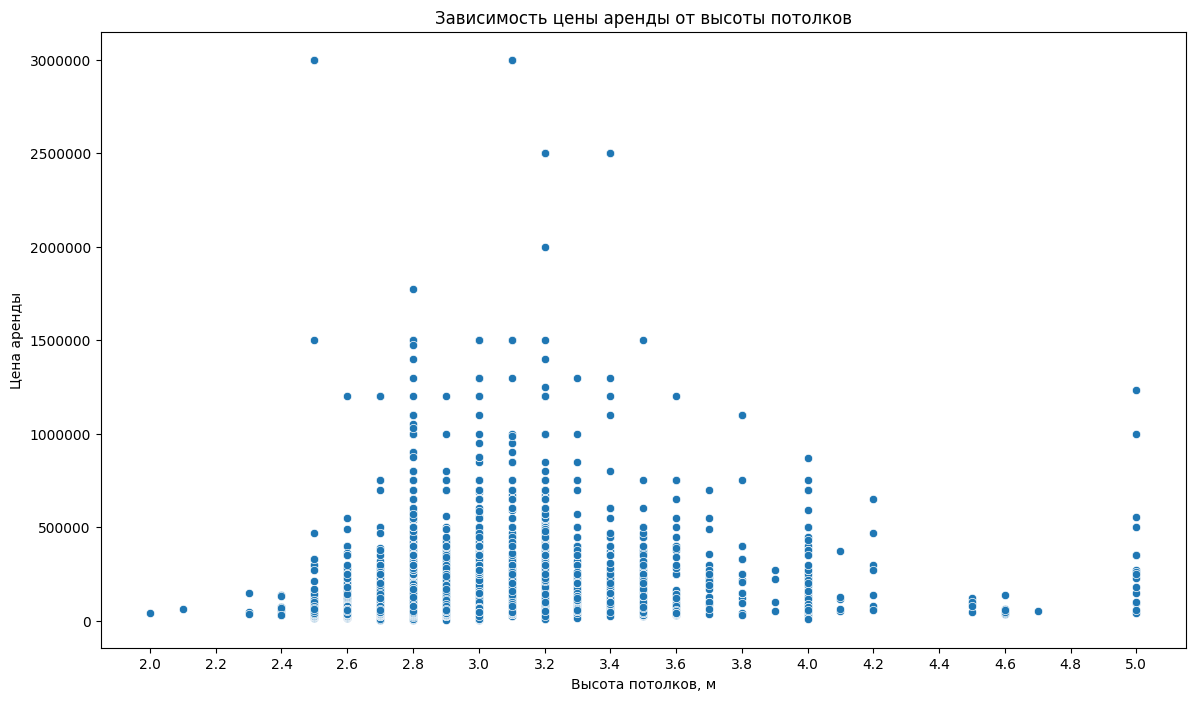

In [8]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='ceiling_height', y='rental_price', data=df)
plt.title('Зависимость цены аренды от высоты потолков')
#plt.ylim(::10000)
#plt.gca().yaxis.set_major_locator(MultipleLocator(50000))
plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
plt.ticklabel_format(style='plain')
plt.xlabel('Высота потолков, м')
plt.ylabel('Цена аренды')

In [9]:
#groups = [group['price_rent'] for name, group in df.groupby('garbage_chute')]# Проверка наличия статистически значимых различий между группами
#f_statistic, p_value = f_oneway(*groups)

In [65]:
def ceiling_code(height):
    if 2.8 <= height <= 3.4: 
        return 1
    else:
        return 0

df['ceiling_coding'] = df['ceiling_height'].apply(ceiling_code)  #Заменить на ceiling_height
df.head()

,id,rooms,adress,area,building,parking,description,repair,rental_price,deposit,...,housing_complex,ceiling_height,elevator,garbage_chute,floor_count,rental_term,ceiling_coding,garbage_coding,type_elevator,lift_coding
0,271271157,4,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,500000,500000,...,"Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да,16,1,1,0,"Пасс ,Груз",1
1,271634126,4,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,500000,500000,...,Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет,16,1,0,1,"Пасс ,Груз",1
2,271173086,"4, Оба варианта","Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,500000,500000,...,Новый Арбат,3.2,Пасс (1),Нет,16,1,1,1,Пасс,1
3,272197456,"4, Оба варианта","Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,400000,400000,...,0,3.2,Пасс (1),Да,6,1,1,0,Пасс,1
4,273614615,2,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",Unknown,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,225000,225000,...,The Book,3.9,"Пасс (1), Груз (1)",Да,26,1,0,0,"Пасс ,Груз",1


**Высота потолков**

In [10]:
#Кодировка значений высоты потолка. Т.к. если потолок выше 3.2, то основная доля стоимости аренды находиться в высшем диапазоне, то им присваивается большее значение.
def ceiling_code(height):
    if height <= 3.2: 
        return 1
    if 3.21 <= height <= 4.0:
        return 2
    if height >= 4.1:
        return 3
    else:
        return height

In [11]:
df['ceiling_coding'] = df['ceiling_height'].apply(ceiling_code)

In [12]:
df['ceiling_coding'].value_counts()

ceiling_coding
1    19189
2      505
3       43
Name: count, dtype: int64

In [13]:
#df['elevator'] = df['elevator'].str.split(',').apply(lambda x: x[0] if isinstance(x, list) and len(x) > 1 else None)

**Мусоропровод**

In [15]:
group = df.groupby('garbage_chute')

In [16]:
anova_results = f_oneway(*[group['rental_price'] for name, group in df.groupby('garbage_chute')])
anova_results

F_onewayResult(statistic=74.14031942501394, pvalue=7.813570859713144e-18)

In [31]:
round(df.groupby('garbage_chute')['rental_price'].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
garbage_chute,,,,,,,,
Да,14609.0,81919.13,133247.44,5000.0,38000.0,46000.0,65000.0,3000000.0
Нет,5128.0,99796.07,111314.39,5000.0,45000.0,63000.0,105000.0,2000000.0


In [30]:
def garbage_code(garbage):
    if garbage == 'Нет':
        return 1
    if garbage == 'Да': 
        return 0
    else:
        return garbage

In [32]:
df['garbage_coding'] = df['garbage_chute'].apply(garbage_code)  #Заменить на garbage_chute
df.head()

,id,rooms,adress,area,building,parking,description,repair,rental_price,deposit,...,сhildren/pets_allowed,additionally,housing_complex,ceiling_height,elevator,garbage_chute,floor_count,rental_term,ceiling_coding,garbage_coding
0,271271157,4,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,500000,500000,...,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да,16,1,1,0
1,271634126,4,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,500000,500000,...,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет,16,1,2,1
2,271173086,"4, Оба варианта","Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,500000,500000,...,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.2,Пасс (1),Нет,16,1,1,1
3,272197456,"4, Оба варианта","Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,400000,400000,...,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",0,3.2,Пасс (1),Да,6,1,1,0
4,273614615,2,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",Unknown,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,225000,225000,...,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,3.9,"Пасс (1), Груз (1)",Да,26,1,2,0


In [66]:
group2 = df.groupby('housing_complex')
anova_results = f_oneway(*[group['rental_price'] for name, group in df.groupby('housing_complex')])
anova_results

F_onewayResult(statistic=17.322863236212036, pvalue=0.0)

In [73]:
def housing_agg(house):
    if house == 0:
        return 'Нет'
    else:
        return 'Да'

df['house_name'] = df['housing_complex'].apply(housing_agg)

In [74]:
round(df.groupby('house_name')['rental_price'].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
house_name,,,,,,,,
Да,19737.0,86563.85,128148.32,5000.0,39990.0,50000.0,75000.0,3000000.0


**ПО ЛИФТУ**
***ЗАБРАТЬ ОТСЮДА**

In [43]:
round(df.groupby('elevator')['rental_price'].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
elevator,,,,,,,,
Груз (1),57.0,140612.81,137928.70,27000.0,48000.00,100000.0,180000.00,700000.0
Груз (2),18.0,70333.33,35895.27,40000.0,50750.00,64000.0,73750.00,200000.0
Груз (3),15.0,141466.67,144494.62,37000.0,57500.00,75000.0,150000.00,490000.0
Груз (4),25.0,68284.00,40026.76,30000.0,45000.00,55000.0,70000.00,210000.0
Груз (6),1.0,280000.00,NaN,280000.0,280000.00,280000.0,280000.00,280000.0
Груз (8),1.0,40000.00,NaN,40000.0,40000.00,40000.0,40000.00,40000.0
Нет,2333.0,69824.37,131815.36,15000.0,35000.00,42000.0,50000.00,2500000.0
Пасс (1),4865.0,104991.93,161723.05,10000.0,40000.00,50000.0,95000.00,3000000.0
"Пасс (1), Груз (1)",4300.0,83139.42,108900.43,5000.0,40000.00,52000.0,76999.25,2500000.0


In [ ]:
#Укрупняем разбивку по лифтам, убираем кол-во, оставляем только тип

In [59]:
df['type_elevator'] = df['elevator'].str.replace(r'\(\d+\)', '', regex=True) #ЗАМЕНИТЬ type_elevator на elevator
df['type_elevator'] = df['type_elevator'].str.replace(', ', ',')
round(df.groupby('type_elevator')['rental_price'].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
type_elevator,,,,,,,,
Груз,117.0,114786.58,117048.32,27000.0,48000.0,70000.0,120000.0,700000.0
Нет,2333.0,69824.37,131815.36,15000.0,35000.0,42000.0,50000.0,2500000.0
Пасс,425.0,171613.86,244579.22,25000.0,45000.0,65000.0,200000.0,2500000.0
Пасс,10291.0,86928.69,132969.61,5000.0,38000.0,50000.0,75000.0,3000000.0
"Пасс ,Груз",6571.0,85932.36,103860.77,5000.0,41000.0,55000.0,85000.0,2500000.0


In [60]:
#объединяем в 3 категории Пасс, Пасс + Груз, Нет лифта
def join2_type_elevators(elevator):
    if 'Груз' in elevator:
        return 'Пасс ,Груз'
    else:
        return elevator


df['type_elevator'] = df['type_elevator'].apply(join2_type_elevators)
round(df.groupby('type_elevator')['rental_price'].describe(), 2) 
#Т.к. существенной корреляции между Пасс и Пасс, Груз в цене нет, то оставляем только Есть и Нет 

,count,mean,std,min,25%,50%,75%,max
type_elevator,,,,,,,,
Нет,2333.0,69824.37,131815.36,15000.0,35000.0,42000.0,50000.0,2500000.0
Пасс,425.0,171613.86,244579.22,25000.0,45000.0,65000.0,200000.0,2500000.0
Пасс,10291.0,86928.69,132969.61,5000.0,38000.0,50000.0,75000.0,3000000.0
"Пасс ,Груз",6688.0,86437.13,104164.75,5000.0,41500.0,55000.0,85000.0,2500000.0


In [55]:
def lift_code(lift):
    if lift == 'Нет':
        return 0
    else: 
        return 1

In [58]:
df['lift_coding'] = df['elevator'].apply(lift_code)  #Заменить на garbage_chute
df.head()

,id,rooms,adress,area,building,parking,description,repair,rental_price,deposit,...,housing_complex,ceiling_height,elevator,garbage_chute,floor_count,rental_term,ceiling_coding,garbage_coding,type_elevator,lift_coding
0,271271157,4,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,500000,500000,...,"Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да,16,1,1,0,"Пасс ,Груз",1
1,271634126,4,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,500000,500000,...,Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет,16,1,2,1,"Пасс ,Груз",1
2,271173086,"4, Оба варианта","Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,500000,500000,...,Новый Арбат,3.2,Пасс (1),Нет,16,1,1,1,Пасс,1
3,272197456,"4, Оба варианта","Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,400000,400000,...,0,3.2,Пасс (1),Да,6,1,1,0,Пасс,1
4,273614615,2,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",Unknown,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,225000,225000,...,The Book,3.9,"Пасс (1), Груз (1)",Да,26,1,2,0,"Пасс ,Груз",1


In [53]:
#объединяем в 3 категории Пасс, Пасс + Груз, Нет лифта
def join2_type_elevators(elevator):
    if 'Груз' in elevator:
        return 'Пасс ,Груз'
    else:
        return elevator


df['type_elevator'] = df['type_elevator'].apply(join2_type_elevators)
round(df.groupby('type_elevator')['rental_price'].describe(), 2) 

,count,mean,std,min,25%,50%,75%,max
type_elevator,,,,,,,,
Нет,2333.0,69824.37,131815.36,15000.0,35000.0,42000.0,50000.0,2500000.0
Пасс,425.0,171613.86,244579.22,25000.0,45000.0,65000.0,200000.0,2500000.0
Пасс,10291.0,86928.69,132969.61,5000.0,38000.0,50000.0,75000.0,3000000.0
"Пасс ,Груз",6688.0,86437.13,104164.75,5000.0,41500.0,55000.0,85000.0,2500000.0


In [40]:
round(df.groupby('floor_count')['rental_price'].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
floor_count,,,,,,,,
1,5.0,32200.00,8584.87,23000.0,27000.00,30000.0,36000.0,45000.0
2,39.0,240615.38,323444.51,25000.0,35000.00,55000.0,425000.0,1500000.0
3,117.0,236098.28,356282.02,10000.0,40000.00,115000.0,290000.0,3000000.0
4,265.0,177975.04,212168.71,20000.0,43000.00,75000.0,250000.0,1100000.0
5,2332.0,73557.59,132723.32,15000.0,35000.00,43000.0,55000.0,2500000.0
...,...,...,...,...,...,...,...,...
80,1.0,450000.00,NaN,450000.0,450000.00,450000.0,450000.0,450000.0
85,16.0,256174.94,69340.24,179900.0,199999.75,249500.0,262500.0,432000.0
86,2.0,314500.00,120915.26,229000.0,271750.00,314500.0,357250.0,400000.0


Text(0, 0.5, 'Цена аренды')

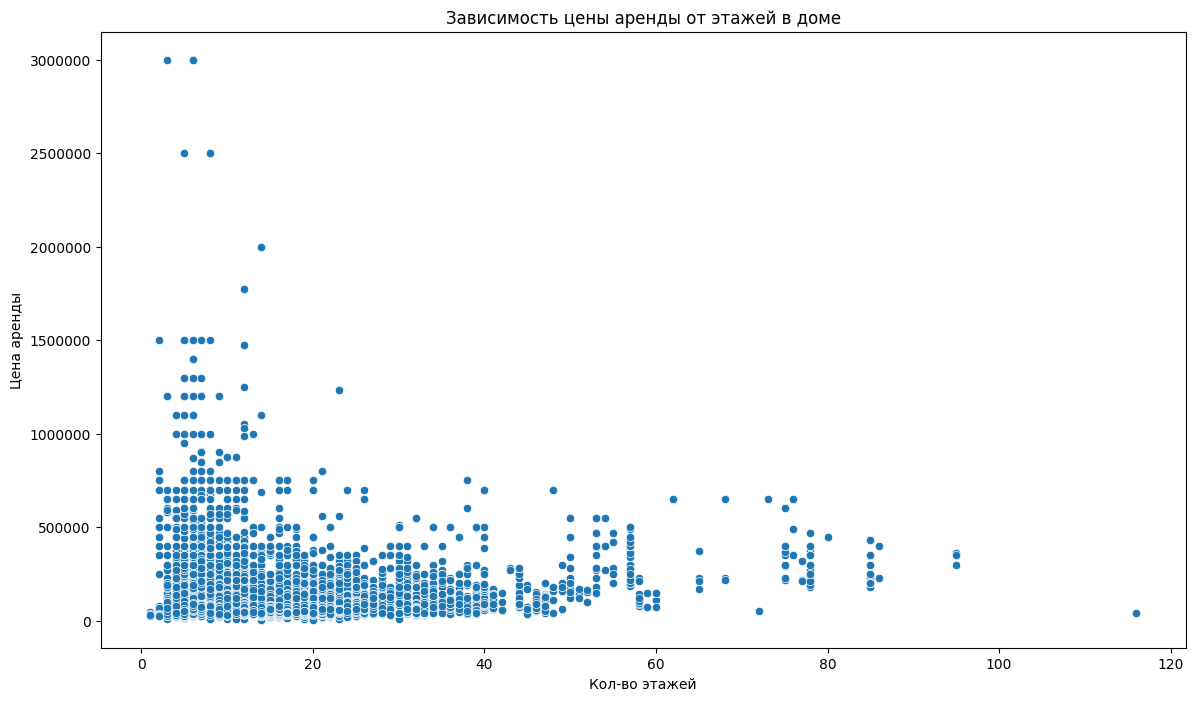

In [39]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='floor_count', y='rental_price', data=df)
plt.title('Зависимость цены аренды от этажей в доме')
plt.ticklabel_format(style='plain')
plt.xlabel('Кол-во этажей')
plt.ylabel('Цена аренды')


In [34]:
df['floor_count'].value_counts()

floor_count
9      2951
5      2332
17     2118
12     2079
14     1390
       ... 
80        1
72        1
73        1
62        1
116       1
Name: count, Length: 73, dtype: int64